Koshkareva Julia MS-DS2

Lab 8

In [ ]:
Link Github: 

# Assignment 1

In [267]:
import pandas as pd
import numpy as np

data1 = pd.read_csv("ds-boot-2.csv", sep='\t')
data2 = pd.read_csv("ds-boot-1.csv", sep='\t')

data1.head(3)

,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12


Divide dataset in two parts: targets and predictors

In [268]:
#extract targets
target_name = ['y1', 'y2', 'y3','y4','y5']
targets = data1[target_name]
data1.drop(target_names, axis=1, inplace=True)
data1.drop('id', axis=1, inplace=True)


Bootstrap method implementation.
As arguments method takes dataset, statistic to estimate(median, mean or etc.), number of samples to generate (1000 by default).
Method returns mean and std for the statistics.

In [269]:
def bootstrap_method(data, statistic, num_samples = 1000):
    samples = np.random.choice(data, size = (B, len(data)))
    stat_to_sample = np.apply_along_axis(statistic, 1, samples)
    samples_mean = np.mean(stat_to_sample)
    samples_std = np.std(stat_to_sample)
    return samples_mean, samples_std


The results of estimation (for y1...y5) :

In [270]:
print("For alpha = 0.05")
for i in range(1,len(target_name)+1):
    results = bootstrap_method(targets['y'+str(i)], np.mean)
    print("For y", i, " : mean = ", results[0], "+- ", 1.96 * results[1])
    results = bootstrap_method(targets['y'+str(i)], np.median)
    print("For y", i, " : median = ", results[0], "+- ", 1.96 * results[1])
    print('-------------------')

For alpha = 0.05
For y 1  : mean =  4.0491625 +-  0.902958630131
For y 1  : median =  4.0725 +-  1.23785871165
-------------------
For y 2  : mean =  5.53751875 +-  1.05280030625
For y 2  : median =  6.178625 +-  1.24345547326
-------------------
For y 3  : mean =  7.31921475 +-  0.890637354006
For y 3  : median =  8.307715 +-  0.537340188728
-------------------
For y 4  : mean =  1.528843 +-  0.217224283898
For y 4  : median =  1.85085 +-  0.260191956301
-------------------
For y 5  : mean =  5.62817425 +-  0.848385511131
For y 5  : median =  6.1759 +-  0.858021515012
-------------------


Estimation a linear model for each target label yi for better prediction of yi

In [318]:
from sklearn.linear_model import LinearRegression

features = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28']
for label in target_name:
    model = LinearRegression()
    model.fit(data1[features], targets[label])
    print(label, model.coef_)

y1 [ 0.35238786 -0.0872593  -0.47204603  1.12128335 -0.32560952  0.91660928
 -1.07016296 -0.21037968 -0.18459108 -0.34269019  0.76401483  0.04013402
  0.21971176 -0.13237054 -0.80100357  0.25559588  0.57798811 -0.12112813
 -0.41820161 -0.25960643  0.79350498 -0.11337128  0.41039151 -0.3828399
  0.60313631  0.13697149 -0.39762446 -0.10356152]
y2 [-0.09055827 -0.2050101  -0.05756693  1.03295264 -0.42786848  1.22539664
 -0.01825599 -0.68348882 -0.33734167 -0.09156443  0.49654811 -0.21745172
  0.26198597  0.09479527 -0.7772984   0.28368651  0.4317742  -0.10643211
 -0.61382392 -0.0328918   0.79248176  0.09582615 -0.12371058 -0.11463058
  0.57389034  0.37649207 -0.68727974 -0.25598829]
y3 [ 0.05157219  0.03175493  0.149808    0.01589611  0.1029     -0.11601275
  0.25664993  0.15280769  0.08837127  0.03041985  0.11124292  0.13854785
  0.01647018  0.03454529  0.11762181 -0.0127462  -0.05198404 -0.0101363
  0.07286634  0.03473763 -0.08167806 -0.03622821  0.0027341   0.04252822
 -0.08627449 -0.0

In [328]:
def bootstrap(X, Y, B=1000, model_class=LinearRegression):
    n = X.shape[0]
    coeffs = []
    for b in range(B):
        model = model_class()
        idx = np.random.randint(n, size=n)
        model.fit(X.as_matrix()[idx, :], Y.as_matrix()[idx])
        coeffs.append(np.append(model.coef_, model.intercept_))
    coeffs = np.array(coeffs)
    conf_int = np.percentile(coeffs, [2.5, 97.5], axis=0)
    return coeffs.mean(axis=0), conf_int
features = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28']
for label in target_name:
    coeffs, intervals = bootstrap(data1[features], targets[label])
    print(label, ':\n'
          'coef', coeffs[:-1], 'inpt', coeffs[-1], '\n',
          'from', intervals[0][:-1], '    ', intervals[0][-1], '\n',
          'to  ', intervals[1][:-1], '    ', intervals[1][-1], '\n')

y1 :
coef [ 0.3244977  -0.01003158 -0.08719649  0.59335007 -0.26479475  0.22900739
 -0.39437227 -0.06081062 -0.02592986 -0.18395833  0.34715396  0.05607682
  0.12306048 -0.03794098 -0.44249922  0.18424717  0.32170097 -0.05284809
 -0.20517494 -0.16148892  0.35842141 -0.03699993  0.34501893 -0.23899628
  0.20341155  0.04668029 -0.0253792  -0.13795633] inpt -0.0419229206979 
 from [-0.44924387 -0.49736298 -0.93528367 -0.16812087 -0.89366633 -0.56021614
 -1.62408358 -0.86907392 -0.81917234 -0.92742228 -0.34675133 -0.72313459
 -0.58333259 -0.65301603 -1.05087716 -0.23634134 -0.16053326 -0.64586019
 -0.82882272 -0.66424808 -0.13214414 -0.50354561 -0.08939785 -0.84485577
 -0.30287032 -0.50370798 -0.63559459 -0.56929117]      -1.91069382538e-14 
 to   [ 1.47684528  0.49517434  0.49082447  1.4373547   0.39549706  1.28027906
  0.29668773  0.62104845  0.69079774  0.52185571  1.22054522  0.84219354
  0.81842574  0.50603079  0.130008    0.58945369  0.96340546  0.47467615
  0.36544213  0.38034123  0

# Assignment 2

In [281]:
data2.head()

,day,bugsPerDay,cummBugs
0,1,0,0
1,2,1,1
2,3,0,1
3,4,2,3
4,5,1,4


In [272]:
data2.describe()

,day,bugsPerDay,cummBugs
count,1327.000000,1327.000000,1327.000000
mean,664.000000,4.212509,2894.581763
std,383.216214,8.803797,2013.662007
min,1.000000,0.000000,0.000000
25%,332.500000,0.000000,765.000000
50%,664.000000,2.000000,3186.000000
75%,995.500000,6.000000,4994.500000
max,1327.000000,224.000000,5590.000000


Implement several models to find the best one.

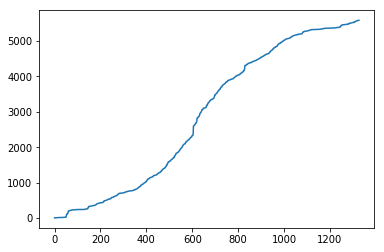

In [273]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data2['cummBugs'])
plt.show()

In [283]:
def GOS(a, b, t):
    return (a * (1 - (1 + b * t) * np.exp(-b * t)))

def gompertz(a, b, c, t):
    return (a * (b ** (c ** t)))

def yamada_raleigh(a, r, alpha, beta, t):
    return (a * (1 - np.exp(-r * alpha * (1 - np.exp(-beta * t ** 2 / 2)))))

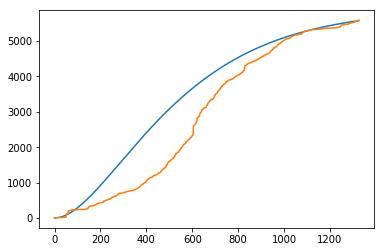

In [284]:
a = 5900
b = 0.0035
x1 = np.arange(1327)
x_GOS = GOS(a, b, x1)
plt.plot(x_GOS)
plt.plot(data2['cummBugs'])
plt.show()

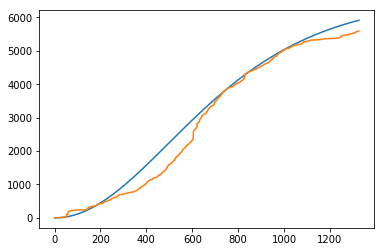

In [276]:
a = 8900
alpha = 1.2
beta = 0.000002
r = 1.1
x2 = np.arange(1327)
x_yamad = yamada_raleigh(a, r, alpha, beta, x2)
plt.plot(x_yamad)
plt.plot(data2['cummBugs'])
plt.show()

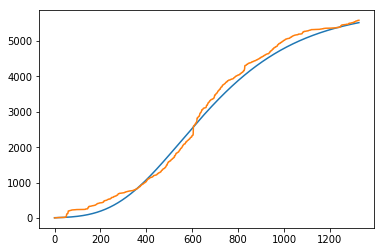

In [277]:
a = 5900
b = 0.001
c = 0.9965
x2 = np.arange(1327)
x_gomp = gompertz(a, b, c, x2)
plt.plot(x_gomp)
plt.plot(data2['cummBugs'])
plt.show()

In [285]:
a_gos = 5900
b_gos = 0.0035
def GOS_obj_func(args):
    t = np.arange(len(data2['cummBugs']))
    return ((data2['cummBugs'] - GOS(args[0], args[1], t)) ** 2).sum() 

a_gomp = 5900
b_gomp = 0.001
c_gomp = 0.9965
def Yamad_obj_func(args):
    t = np.arange(len(data2['cummBugs']))
    return ((data2['cummBugs'] - yamada_raleigh(args[0], args[1], args[2], args[3], t)) ** 2).sum() 

a_yamad = 8900
alpha_yamad = 1.2
beta_yamad = 0.000002
r_yamad = 1.1
def Gomp_obj_func(args):
    t = np.arange(len(data2['cummBugs']))
    return ((data2['cummBugs'] - gompertz(args[0], args[1], args[2], t)) ** 2).sum() 


In [291]:
from scipy.optimize import minimize

GOS_result = minimize(GOS_obj_func, [5950, 0.0035], method='Nelder-Mead')
print('G-O S-shaped method', GOS_result.x, GOS_result.fun)

Yamad_result = minimize(Yamad_obj_func,  [1e+09, 1.77295917e-01, 3.37923671e-05, 3.05325708e-06], method = 'Nelder-Mead')
print('Yamada Raleigh method', Yamad_result.x, Yamad_result.fun)

Gomp_result = minimize(Gomp_obj_func, [6000, 0.001, 0.995], method='Nelder-Mead')
print('Gompertz method', Gomp_result.x, Gomp_result.fun)

G-O S-shaped method [  8.52256486e+03   1.86485536e-03] 106308245.876
Yamada Raleigh method [  9.97584863e+08   1.83125164e-01   3.39283610e-05   3.05325892e-06] 53907262.5029
Gompertz method [  6.03152062e+03   8.08154572e-04   9.96446783e-01] 28351423.6786


Let's draw the results:

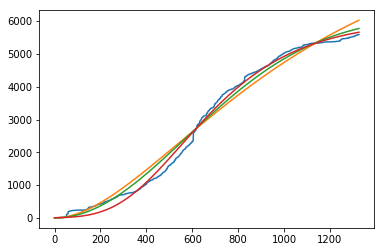

In [292]:
x = np.arange(len(data2['cummBugs']))
x1 = GOS(GOS_result.x[0], GOS_result.x[1], x)
x2 = yamada_raleigh(Yamad_result.x[0], Yamad_result.x[1], Yamad_result.x[2], Yamad_result.x[3], x)
x3 = gompertz(Gomp_result.x[0], Gomp_result.x[1], Gomp_result.x[2], x)

plt.plot(data2['cummBugs'])
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.show()

We can see that best method is Gompertz model. Parameters are: a =  6.03152062e+03; b= 8.08154572e-04; c = 9.96446783e-01.
Now using bootstrap, we estimate the 95%-confidence intervals for each of the model parameters.

In [311]:
def param_Gomp_obj_func(args, cummBugs):
    t = np.arange(len(cummBugs))
    return ((cummBugs - gompertz(args[0], args[1], args[2], t)) ** 2).sum()

def bootsrap_method(data, B = 1000):
    samples = np.random.choice(data, size=(B, len(data)))
    parameters = []

    for sample in samples:
        cummBugs = np.cumsum(sample)

        parameters.append(minimize(param_Gomp_obj_func, [a, b, c], cummBugs, method='Nelder-Mead').x)

    parameters = np.array(parameters)
    estimation = parameters.mean(axis=0)
    conf_int = np.percentile(parameters, [2.5, 97.5], axis=0)
    print("a = ", estimation[0], 'with conf interval from', conf_int[0][0], 'to', conf_int[1][0])
    print("b = ", estimation[1], 'with conf interval from', conf_int[0][1], 'to', conf_int[1][1])
    print("c = ", estimation[2], 'with conf interval from', conf_int[0][2], 'to', conf_int[1][2])
    
B = 1000
data = data2['bugsPerDay']
bootsrap_method(data, B)

a =  7522.58779734 with conf interval from 6216.44644419 to 9891.71407524
b =  0.045858782955 with conf interval from 0.031121295473 to 0.0649313914561
c =  0.998264337653 with conf interval from 0.997856165065 to 0.998659860011
